# Exploratory Data Analysis
Import all the necessary libraries.

In [1]:
import pandas as pd
import glob # used for the * thing in a general filepath
import timeit
import seaborn as sns

%matplotlib inline

## 1. House Sales 1995-2020

In [8]:
df = pd.read_csv('data/pp-2020.csv', header=None)

In [13]:
df.head(1)

,Sale_ID,Price(£),Transfer_Date,Postcode,Property_Type,New_Build,Freehold,Number,Flat_Number,Street,Neighbourhood,Town/City,District,Region,Record_Status,Unknown
0,{9FF0D969-FE3D-11ED-E053-6C04A8C06383},309000,2020-02-07 00:00,NR29 4BQ,D,N,F,HILL COTTAGE,NaN,OLD CHAPEL ROAD,WINTERTON ON SEA,GREAT YARMOUTH,GREAT YARMOUTH,NORFOLK,A,A


In [10]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [11]:
df.columns = ['Sale_ID', 'Price(£)', 'Transfer_Date', 'Postcode', 'Property_Type',
              'New_Build', 'Freehold', 'Number', 'Flat_Number', 'Street',
              'Neighbourhood', 'Town/City', 'District', 'Region',  'Record_Status',
              'Unknown']

In [12]:
df.columns

Index(['Sale_ID', 'Price(£)', 'Transfer_Date', 'Postcode', 'Property_Type',
       'New_Build', 'Freehold', 'Number', 'Flat_Number', 'Street',
       'Neighbourhood', 'Town/City', 'District', 'Region', 'Record_Status',
       'Unknown'],
      dtype='object')

## 2. Postcode detail

In [15]:
sample_postcodes = pd.read_csv('data/National_Statistics_Postcode_Lookup_UK.csv', nrows=10000)

In [18]:
sample_postcodes.head(1)

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID,Lower Layer Super Output Area (LSOA),Ward
0,SL2 1NX,SL2 1NX,SL2 1NX,01-1980,0,496871,181795,1,E99999999,(pseudo) England (UA/MD/LB),...,4B1,Multicultural metropolitans;Challenged Asian t...,-0.605005,51.526769,Postcode Level,06/03/2020,"(51.526769, -0.605005)",1417572,NaN,NaN


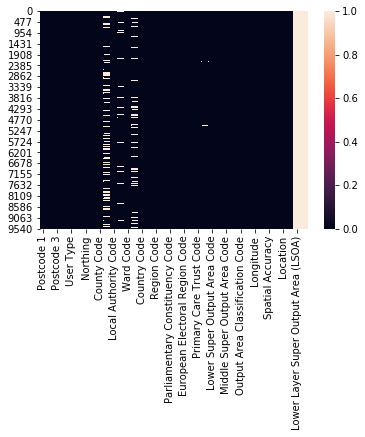

In [108]:
sns.heatmap(sample_postcodes.isna())

In [104]:
list(sample_postcodes.columns)

['Postcode 1',
 'Postcode 2',
 'Postcode 3',
 'Date Introduced',
 'User Type',
 'Easting',
 'Northing',
 'Positional Quality',
 'County Code',
 'County Name',
 'Local Authority Code',
 'Local Authority Name',
 'Ward Code',
 'Ward Name',
 'Country Code',
 'Country Name',
 'Region Code',
 'Region Name',
 'Parliamentary Constituency Code',
 'Parliamentary Constituency Name',
 'European Electoral Region Code',
 'European Electoral Region Name',
 'Primary Care Trust Code',
 'Primary Care Trust Name',
 'Lower Super Output Area Code',
 'Lower Super Output Area Name',
 'Middle Super Output Area Code',
 'Middle Super Output Area Name',
 'Output Area Classification Code',
 'Output Area Classification Name',
 'Longitude',
 'Latitude',
 'Spatial Accuracy',
 'Last Uploaded',
 'Location',
 'Socrata ID',
 'Lower Layer Super Output Area (LSOA)',
 'Ward']